CHURN RISK PREDICTION

An ML Model that predicts the churn score for a website based on multiple features.

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline


In [3]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [4]:
df.shape

(10000, 14)

In [5]:
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
type(df['Surname'])

pandas.core.series.Series

In [10]:
df['Surname']

0        Hargrave
1            Hill
2            Onio
3            Boni
4        Mitchell
          ...    
9995     Obijiaku
9996    Johnstone
9997          Liu
9998    Sabbatini
9999       Walker
Name: Surname, Length: 10000, dtype: object

In [11]:
df[['Surname','CreditScore']]

Surname  CreditScore
0      Hargrave          619
1          Hill          608
2          Onio          502
3          Boni          699
4      Mitchell          850
...         ...          ...
9995   Obijiaku          771
9996  Johnstone          516
9997        Liu          709
9998  Sabbatini          772
9999     Walker          792

[10000 rows x 2 columns]

In [12]:
df.CreditScore.value_counts()

CreditScore
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: count, Length: 460, dtype: int64

In [13]:
df=df.drop(columns=['RowNumber','CustomerId','Surname'])
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [14]:
df['Gender']=df['Gender'].apply(lambda x :  0 if x=='Female' else 1)
df['Gender']=df['Gender'].astype(int)
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France       0   42       2       0.00              1   
1          608     Spain       0   41       1   83807.86              1   
2          502    France       0   42       8  159660.80              3   
3          699    France       0   39       1       0.00              2   
4          850     Spain       0   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [15]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Geography']=label_encoder.fit_transform(df['Geography'])
df.head()

CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619          0       0   42       2       0.00              1   
1          608          2       0   41       1   83807.86              1   
2          502          0       0   42       8  159660.80              3   
3          699          0       0   39       1       0.00              2   
4          850          2       0   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

DATA ANALYSIS

In [17]:
import seaborn as sns

Exited
0    7963
1    2037
Name: count, dtype: int64

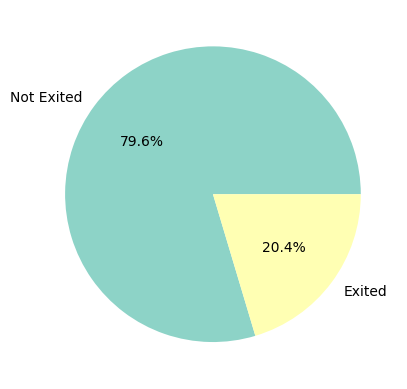

In [18]:
value_counts=df['Exited'].value_counts()
plt.pie(value_counts, labels=['Not Exited', 'Exited'], autopct='%1.1f%%', colors=sns.color_palette('Set3'))


value_counts

In [19]:
X=df.drop('Exited',axis=1)
y=df['Exited']

Balance The Data

In [21]:
import numpy as np
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

print("Class distribution before oversampling:", Counter(y))

ros = RandomOverSampler(random_state=42)

X, y = ros.fit_resample(X, y)

print("Class distribution after oversampling:", Counter(y))

Class distribution before oversampling: Counter({0: 7963, 1: 2037})
Class distribution after oversampling: Counter({1: 7963, 0: 7963})


Standarize the data

In [22]:
X=np.array(X)
X=(X-X.mean())/X.std()

Splitting the data

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

Model Evaluation and Training

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

In [34]:
#logistic regression
lrm = LogisticRegression()
lrm.fit(x_train, y_train)
lrp = lrm.predict(x_test)

print("Logistic Regression:")
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Logistic Regression:
Accuracy: 0.95


In [35]:
# Random Forests
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)

In [37]:
print("Random Forest:")
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Random Forest:
Accuracy: 0.95


In [38]:
# XGBoost (Gradient Boosting)
xgb = xgb.XGBClassifier()
xgb.fit(x_train, y_train)
xgbp = xgb.predict(x_test)

print("XGBoost (Gradient Boosting):")
print("Accuracy:", accuracy_score(y_test, xgbp))

XGBoost (Gradient Boosting):
Accuracy: 0.8976773383553045


In [39]:
#decision trees
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

dt_pred = dt.predict(x_test)

# Evaluate the model's performance
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, dt_pred))


Decision Tree Classifier:
Accuracy: 0.9149403640929065


Saving the Model 

In [40]:
import pickle
file = 'rfc_model.pkl'
pickle.dump(rfc, open(file, 'wb'))

In [41]:
load_model = pickle.load(open(file, 'rb'))